In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import json
import sys
import pandas as pd
from matplotlib import rcParams
from operator import itemgetter

#representation courbe de confience des mots transcrits par paty 

In [28]:
#extraction des informations du fichier json de transcription par paty
#exemple avec VITISPROHIBITAEXTRAIT4_asr_reco.json
nomfichier = "patyTranscription/VITISPROHIBITAEXTRAIT4_asr_reco.json"
with open(nomfichier) as json_data:
    data_dict = json.load(json_data)
confidenceMoy = data_dict["confidence-score"]
words = data_dict["speakers"]
confSpk = []
data = [] #stock les data
for i in range(0, len(words)):
    temp = []
    for j in range(len(words[i]["words"])):
        words[i]["words"][j]["speaker"] = "spk" + str(i)
        data.append(words[i]["words"][j])
        temp.append(words[i]["words"][j]["conf"])
    confSpk.append(temp)

In [29]:
#mettre en ordre chronologique croissant par key "start" 
sortedtime = sorted(data, key=lambda d: d['start'])

listConf = []

listWord = []
listTime = []
abscisse = []
listT = []
for i in range(len(sortedtime)):
    listConf.append(sortedtime[i]["conf"])
    listWord.append(sortedtime[i]["word"])
    listTime.append( (sortedtime[i]["start"], sortedtime[i]["end"]) )
    listT.append(sortedtime[i]["start"])
    abscisse.append( str(listTime[i][0]) + "\n" + sortedtime[i]["speaker"] + ": " + str(listWord[i] ) )
    #print(abscisse[i])
    #print("\n")
#print(listConf)
#print(listWord)
#print(listTime)
npConf = np.array(listConf)
npWord = np.array(listWord)
npAbscisse = np.array(abscisse)
npTime = np.array(listTime)
npT = np.array(listT)

In [30]:
print(len(npWord))

131


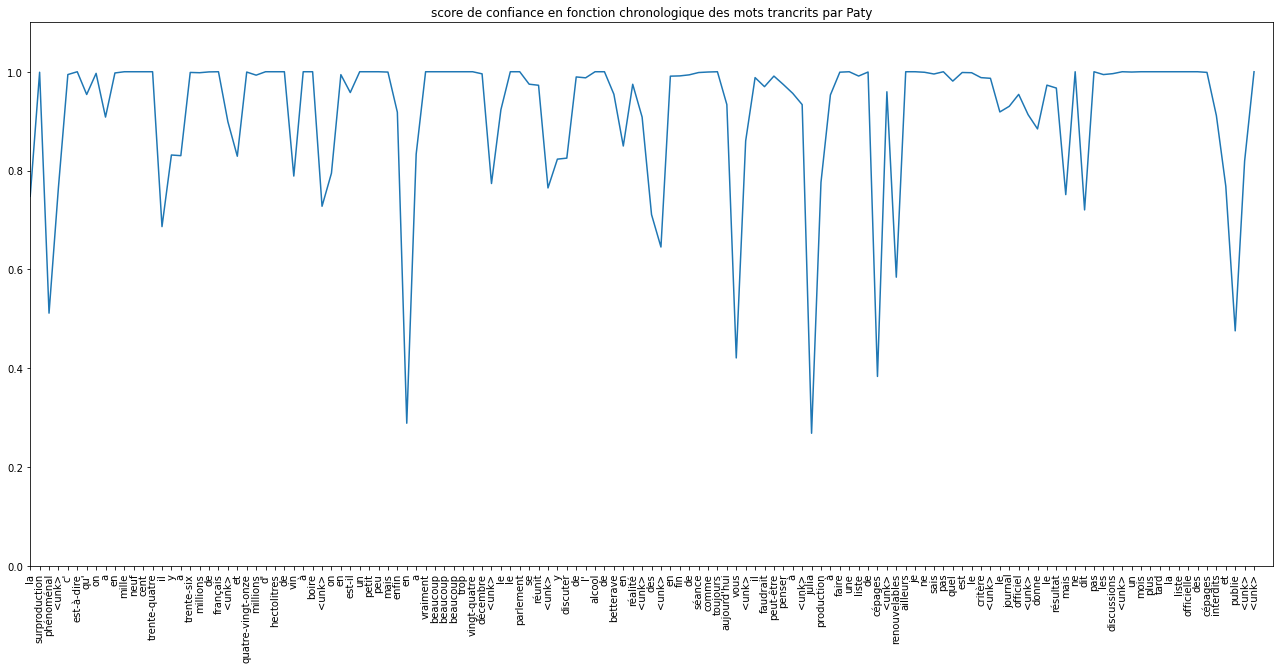

In [37]:
dimx = len(npConf) * 0.17
dimy = 10
plt.figure(figsize=(dimx, dimy))
plt.title("score de confiance en fonction chronologique des mots trancrits par Paty")
plt.plot(npConf)
plt.ylim(0,1.1)
plt.xlim(1,len(npConf)+1)
plt.xticks(range(len(npWord)), npWord, rotation = 90)
plt.show()

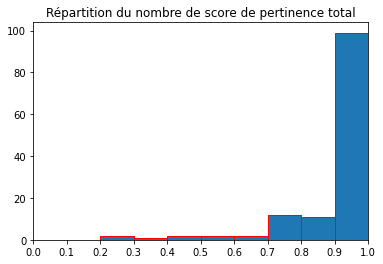

In [36]:
#affichage histogramme (nb de score en tranche seuil de 0.1)
plt.hist(npConf, range= (0, 1), bins = 10, edgecolor = 'red')
plt.title("Répartition du nombre de score de confiance total")
histox = 15
histoy = 10
plt.xlim(0,1)
abx = np.arange(0, 1.1, 0.1)
plt.xticks(abx)
plt.show()

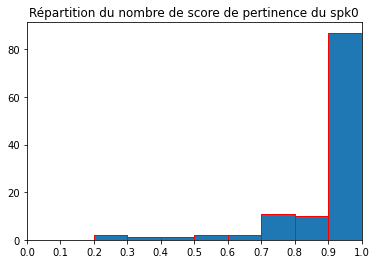

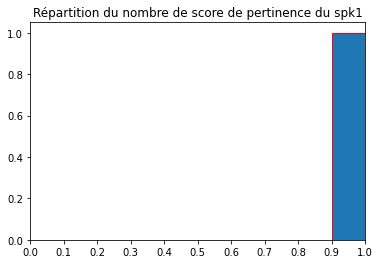

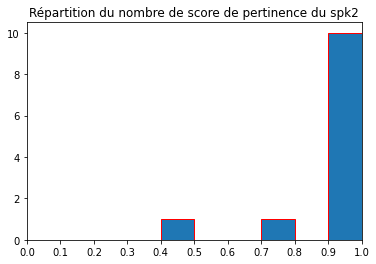

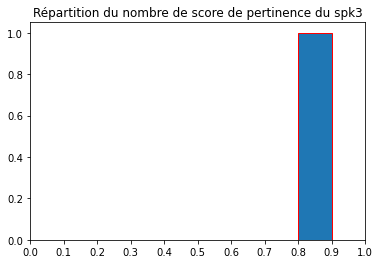

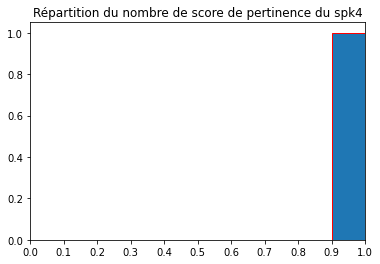

In [35]:
for i in range(len(confSpk)):
    plt.hist(confSpk[i], range= (0, 1), bins = 10, edgecolor = 'red')
    plt.title("Répartition du nombre de score de confiance du spk" + str(i))
    histox = 15
    histoy = 10
    plt.xlim(0,1)
    abx = np.arange(0, 1.1, 0.1)
    plt.xticks(abx)
    plt.show()